In [11]:
import pandas as pd
import re

In [12]:
dataToPlot = ['applicationTime', 'databaseTime', 'numberOfSellOffers', 'numberOfBuyOffers']
folders = ['3600s']

In [36]:
hardware = '8CPU_20RAM'

In [34]:
hardware = '12CPU_30RAM'

In [14]:
tests = ['2repl', '4repl', '6repl', '8repl', '10repl']

In [22]:
tests = ['trans_60s', 'trans_120s', 'trans_180s', 'trans_240s', 'trans_300s']

In [26]:
tests = ['req_20ms', 'req_100ms', 'req_500ms', 'req_1000ms', 'req_2000ms']

In [32]:
tests = ['A1_100-A2_100-A3_100', 'A1_200-A3_100', 'A2_200', 'A2_200-A3_100', 'A3_200']

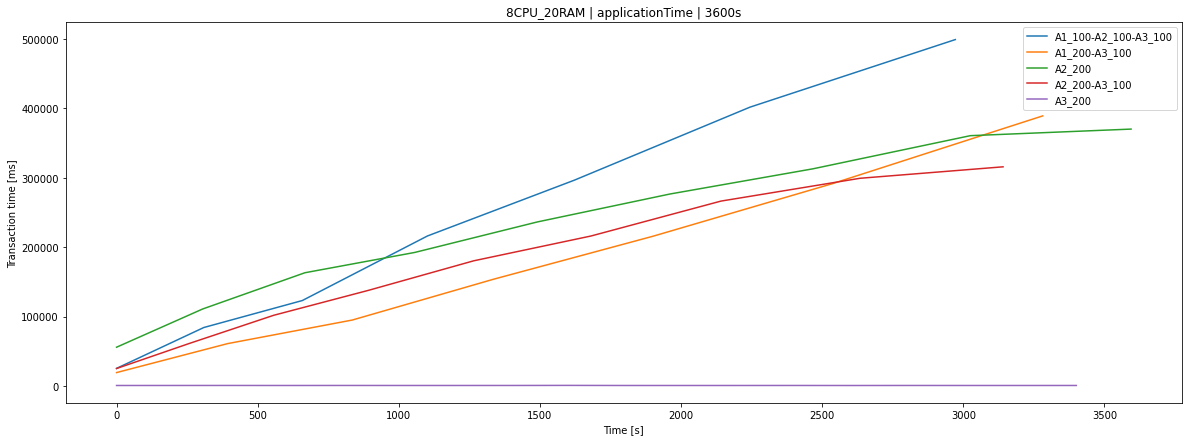

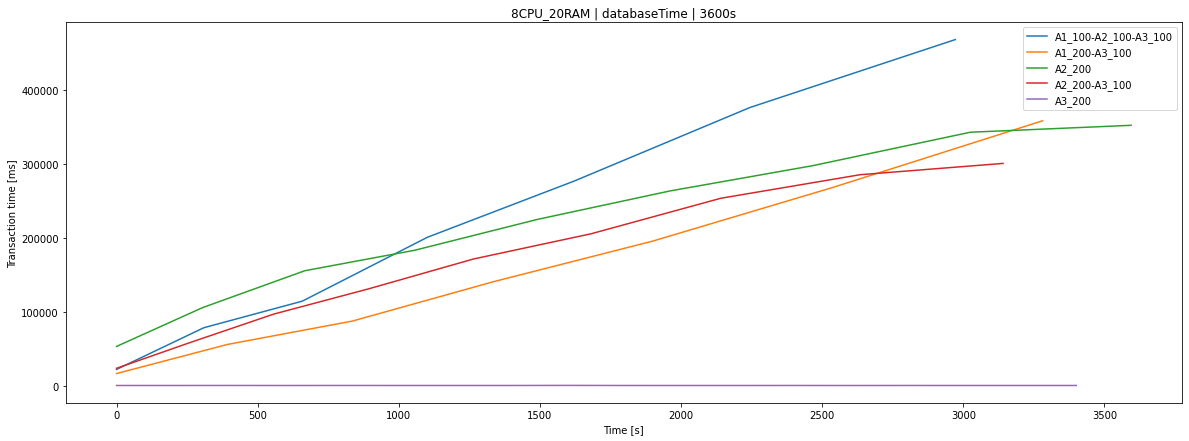

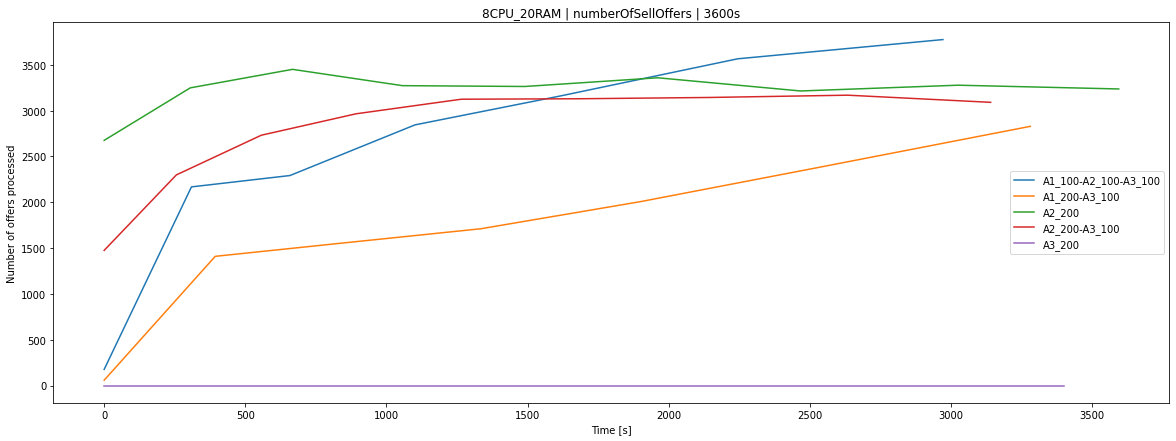

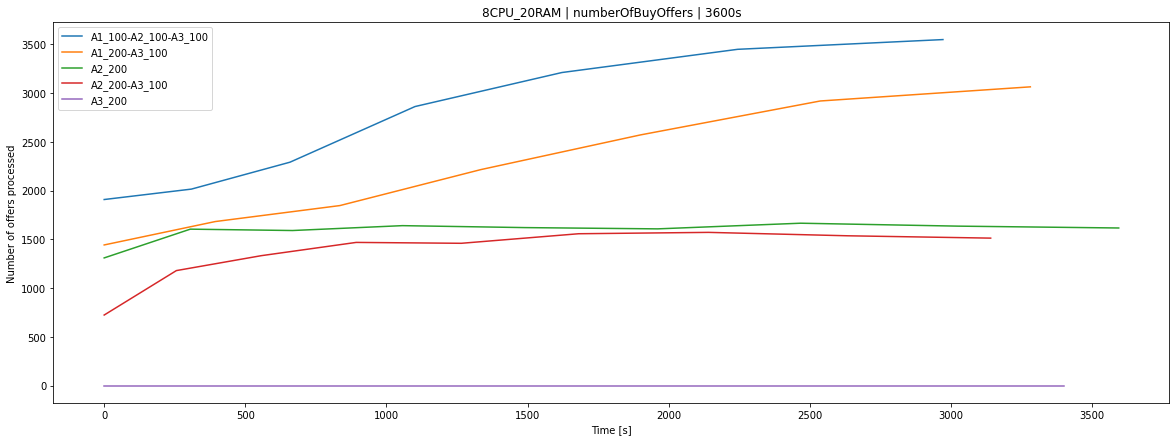

In [37]:
for f in folders:
    for j in dataToPlot:
        data = pd.DataFrame()
        for i in tests:
            try:
                d = pd.read_csv(hardware + '/' + f + '/' + i + '/trading.csv', usecols=['timestamp', j])
            except:
                continue
            d = d.sort_values(by=['timestamp'])
            t = d['timestamp'][0]
            d['Time [s]'] = d['timestamp'].apply(lambda x: (x - t)/1000)

            customDataFrame = pd.DataFrame({'Time [s]': d['Time [s]'], i: d[j]})
            customDataFrame = customDataFrame.loc[customDataFrame['Time [s]'] < 3600]
            
            data = pd.concat([data, customDataFrame])
        ax = data.set_index('Time [s]').plot(figsize=(20, 7), title = hardware + ' | ' +  j + ' | ' + f)
        ax.set_xlabel("Time [s]")
        if re.search("^.*Time$", j):
            ax.set_ylabel("Transaction time [ms]")
        else:
            ax.set_ylabel("Number of offers processed")